**Welcome to Souk Connect - Modernizing Traditional Souks 🏺!**


---


In this notebook, we will explore the development of **Souk Connect**, an innovative platform that combines AI 🤖 and AR 🌐 to bring Morocco's traditional souks into the digital age.

The platform has three key goals:
*   Helping artisans easily manage their stock using AI-driven tools 📦.

*   Allowing international visitors to explore products in immersive ways, including detailed pricing suggestions 💰 and background information on craftsmanship 👓.
*   Facilitating seamless international transactions for a global marketplace 💳.

By leveraging cutting-edge technologies like **AI pricing algorithms** 🤓, **real-time stock tracking** 📊, and **multilingual product descriptions** 🌍, Souk Connect ensures Moroccan artisans can access and thrive in global markets.

 Let’s get started by diving into how we can collect the data needed for product recognition and pricing suggestions. 🚀


# 🕸️ Step 1: Web Scraping - Collecting Data from Websites 🌐

In this section, we will scrape data from various websites to collect product information that will be used for training our model.

We'll extract relevant details like product names, descriptions, images, and prices.

Web scraping will help us build a robust dataset for training the recognition model and generating dynamic pricing suggestions.

Here is the link to the scraped datasets and stored in this Google Drive: https://drive.google.com/drive/folders/1e8Z5-WXqtCmUJ6K45RdPBp9y1hB-7nkD?usp=sharing

Here is the link to the executable code https://colab.research.google.com/drive/1vjRhByzUTji_eF7k1h4MTNDVkI1vd_hj#scrollTo=BTl4uzS3UleI



In [ ]:
import requests
from bs4 import BeautifulSoup
from urllib.parse import urljoin

# Configuration
#base_url = "https://www.marrakeche.com/home-decor/page/{}/"

#base_url = "https://www.marrakeche.com/bags-and-accessories/page/{}/"

base_url = "https://www.marrakeche.com/moroccan-kitchenware-tea-accessories/page/{}/"



headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
}

# Initialisation
product_links = set()

# Parcourir les pages
for page in range(0,21):  # Modifier la plage en fonction du nombre de pages disponibles
    url = base_url.format(page)
    print(f"Scraping page: {url}")
    response = requests.get(url, headers=headers)

    # Vérifiez si la page existe
    if response.status_code != 200:
        print(f"Page {page} not found, stopping...")
        break

    # Parser le contenu HTML
    soup = BeautifulSoup(response.content, 'html.parser')

    # Trouver les liens des produits dans les balises <h3>
    links = soup.find_all('h3', class_="wd-entities-title")

    if not links:  # Si aucune donnée n'est trouvée, arrêter
        print("No more products found.")
        break

    for h3 in links:
        # Vérifier si le <h3> contient une balise <a> avec un 'href'
        a_tag = h3.find('a')
        if a_tag and 'href' in a_tag.attrs:
            product_links.add(urljoin(base_url, a_tag['href']))  # Formater les liens complets

# Résultats
print(f"Total products scraped: {len(product_links)}")

for link in product_links:
    print(link)
print(len(product_links))
import shutil
from google.colab import files

# Spécifiez le chemin du dossier à compresser
folder_path = '/content/myimages3'

# Spécifiez le nom du fichier zip de sortie
zip_file = '/content/mon_dossier3.zip'

# Compresser le dossier en fichier zip
shutil.make_archive(zip_file.replace('.zip', ''), 'zip', folder_path)

# Télécharger le fichier zip
files.download(zip_file)
import requests
from bs4 import BeautifulSoup
import os
import pandas as pd

# Liste des liens des produits (remplacer avec vos propres liens)


# Créer les dossiers nécessaires
os.makedirs("myimages1", exist_ok=True)

# Liste pour stocker les données de tous les produits
all_product_data = []

# Parcourir chaque lien de produit dans la liste
for url in product_links:
    print(f"Scraping data for product: {url}")

    # Requête HTTP
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')

    # Initialiser un dictionnaire pour stocker les données du produit
    product_data = {}

    #______________________IMAGE___________________________________
    # Trouver l'image principale
    #______________________IMAGE___________________________________
    # Trouver l'image principale avec une vérification
    image_tag = soup.find('figure', class_='woocommerce-product-gallery__image')

    if image_tag:
        img_tag = image_tag.find('img')
        if img_tag and 'data-large_image' in img_tag.attrs:
            image_url = img_tag['data-large_image']
            print(f"Image URL: {image_url}")

            # Télécharger l'image
            image_response = requests.get(image_url)
            image_name = os.path.join("myimages1", os.path.basename(image_url))

            # Sauvegarder l'image
            with open(image_name, 'wb') as file:
                file.write(image_response.content)

            product_data["Image"] = image_name
        else:
            print("Aucune image de haute résolution trouvée.")
            product_data["Image"] = "N/A"
    else:
        print("Balise image introuvable.")
        product_data["Image"] = "N/A"

    #________________CATEGORIE__________________________
    # Trouver la balise contenant les catégories
    categories_tag = soup.find('span', class_='posted_in')

    # Extraire toutes les catégories (liens dans les balises <a>)
    if categories_tag:
        categories = [a.get_text(strip=True) for a in categories_tag.find_all('a')]
        product_data["Categories"] = ', '.join(categories)
    else:
        product_data["Categories"] = "N/A"

    #____________________NAME____________________
    name_tag = soup.find('h1', class_='product_title entry-title wd-entities-title')
    product_data["Name"] = name_tag.get_text(strip=True) if name_tag else "N/A"

    #____________________SIZE______________________
    # Extraire la taille
    size_element = soup.find('tr', class_='woocommerce-product-attributes-item--attribute_pa_size')
    if size_element:
        size_link = size_element.find('a', href=True)
        product_data["Size"] = size_link.get_text(strip=True) if size_link else "N/A"
    else:
        product_data["Size"] = "N/A"

    #_________________MATERIAL____________________
    # Extraire les matériaux
    materials_element = soup.find('td', class_='woocommerce-product-attributes-item__value')
    if materials_element:
        materials = [p.get_text(strip=True) for p in materials_element.find_all('p')]
        product_data["Materials"] = ', '.join(materials)
    else:
        product_data["Materials"] = "N/A"

    #_______________________COLOR____________________
    # Extraire les couleurs
    color_element = soup.find('tr', class_='woocommerce-product-attributes-item--attribute_pa_color')
    if color_element:
        colors = [a.get_text(strip=True) for a in color_element.find_all('a')]
        product_data["Colors"] = ', '.join(colors)
    else:
        product_data["Colors"] = "N/A"

    #____________________DESCRIPTION___________________
    # Extraire la première description
    description_div = soup.find('div', class_='woocommerce-Tabs-panel panel entry-content wc-tab woocommerce-Tabs-panel--description')
    if description_div:
        first_paragraph = description_div.find('p')
        product_data["Description"] = first_paragraph.get_text(strip=True) if first_paragraph else "N/A"
    else:
        product_data["Description"] = "N/A"

    # Ajouter les données du produit à la liste
    all_product_data.append(product_data)

# Convertir les données en DataFrame pandas
df = pd.DataFrame(all_product_data)

# Exporter vers un fichier Excel
df.to_excel('data1.xlsx', index=False)

print(f"Data saved to data1.xlsx and images saved in the 'myimages1' folder.")
import requests
from bs4 import BeautifulSoup
import os
import pandas as pd

# Liste des liens des produits (remplacer avec vos propres liens)


# Créer les dossiers nécessaires
os.makedirs("myimages2", exist_ok=True)

# Liste pour stocker les données de tous les produits
all_product_data = []

# Parcourir chaque lien de produit dans la liste
for url in product_links:
    print(f"Scraping data for product: {url}")

    # Requête HTTP
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')

    # Initialiser un dictionnaire pour stocker les données du produit
    product_data = {}

    #______________________IMAGE___________________________________
    # Trouver l'image principale
    #______________________IMAGE___________________________________
    # Trouver l'image principale avec une vérification
    image_tag = soup.find('figure', class_='woocommerce-product-gallery__image')

    if image_tag:
        img_tag = image_tag.find('img')
        if img_tag and 'data-large_image' in img_tag.attrs:
            image_url = img_tag['data-large_image']
            print(f"Image URL: {image_url}")

            # Télécharger l'image
            image_response = requests.get(image_url)
            image_name = os.path.join("myimages2", os.path.basename(image_url))

            # Sauvegarder l'image
            with open(image_name, 'wb') as file:
                file.write(image_response.content)

            product_data["Image"] = image_name
        else:
            print("Aucune image de haute résolution trouvée.")
            product_data["Image"] = "N/A"
    else:
        print("Balise image introuvable.")
        product_data["Image"] = "N/A"

    #________________CATEGORIE__________________________
    # Trouver la balise contenant les catégories
    categories_tag = soup.find('span', class_='posted_in')

    # Extraire toutes les catégories (liens dans les balises <a>)
    if categories_tag:
        categories = [a.get_text(strip=True) for a in categories_tag.find_all('a')]
        product_data["Categories"] = ', '.join(categories)
    else:
        product_data["Categories"] = "N/A"

    #____________________NAME____________________
    name_tag = soup.find('h1', class_='product_title entry-title wd-entities-title')
    product_data["Name"] = name_tag.get_text(strip=True) if name_tag else "N/A"

    #____________________SIZE______________________
    # Extraire la taille
    size_element = soup.find('tr', class_='woocommerce-product-attributes-item--attribute_pa_size')
    if size_element:
        size_link = size_element.find('a', href=True)
        product_data["Size"] = size_link.get_text(strip=True) if size_link else "N/A"
    else:
        product_data["Size"] = "N/A"

    #_________________MATERIAL____________________
    # Extraire les matériaux
    materials_element = soup.find('td', class_='woocommerce-product-attributes-item__value')
    if materials_element:
        materials = [p.get_text(strip=True) for p in materials_element.find_all('p')]
        product_data["Materials"] = ', '.join(materials)
    else:
        product_data["Materials"] = "N/A"

    #_______________________COLOR____________________
    # Extraire les couleurs
    color_element = soup.find('tr', class_='woocommerce-product-attributes-item--attribute_pa_color')
    if color_element:
        colors = [a.get_text(strip=True) for a in color_element.find_all('a')]
        product_data["Colors"] = ', '.join(colors)
    else:
        product_data["Colors"] = "N/A"

    #____________________DESCRIPTION___________________
    # Extraire la première description
    description_div = soup.find('div', class_='woocommerce-Tabs-panel panel entry-content wc-tab woocommerce-Tabs-panel--description')
    if description_div:
        first_paragraph = description_div.find('p')
        product_data["Description"] = first_paragraph.get_text(strip=True) if first_paragraph else "N/A"
    else:
        product_data["Description"] = "N/A"

    # Ajouter les données du produit à la liste
    all_product_data.append(product_data)

# Convertir les données en DataFrame pandas
df = pd.DataFrame(all_product_data)

# Exporter vers un fichier Excel
df.to_excel('data2.xlsx', index=False)

print(f"Data saved to data2.xlsx and images saved in the 'myimages2' folder.")
import requests
from bs4 import BeautifulSoup
import os
import pandas as pd

# Liste des liens des produits (remplacer avec vos propres liens)


# Créer les dossiers nécessaires
os.makedirs("myimages3", exist_ok=True)

# Liste pour stocker les données de tous les produits
all_product_data = []

# Parcourir chaque lien de produit dans la liste
for url in product_links:
    print(f"Scraping data for product: {url}")

    # Requête HTTP
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')

    # Initialiser un dictionnaire pour stocker les données du produit
    product_data = {}

    #______________________IMAGE___________________________________
    # Trouver l'image principale
    #______________________IMAGE___________________________________
    # Trouver l'image principale avec une vérification
    image_tag = soup.find('figure', class_='woocommerce-product-gallery__image')

    if image_tag:
        img_tag = image_tag.find('img')
        if img_tag and 'data-large_image' in img_tag.attrs:
            image_url = img_tag['data-large_image']
            print(f"Image URL: {image_url}")

            # Télécharger l'image
            image_response = requests.get(image_url)
            image_name = os.path.join("myimages3", os.path.basename(image_url))

            # Sauvegarder l'image
            with open(image_name, 'wb') as file:
                file.write(image_response.content)

            product_data["Image"] = image_name
        else:
            print("Aucune image de haute résolution trouvée.")
            product_data["Image"] = "N/A"
    else:
        print("Balise image introuvable.")
        product_data["Image"] = "N/A"

    #________________CATEGORIE__________________________
    # Trouver la balise contenant les catégories
    categories_tag = soup.find('span', class_='posted_in')

    # Extraire toutes les catégories (liens dans les balises <a>)
    if categories_tag:
        categories = [a.get_text(strip=True) for a in categories_tag.find_all('a')]
        product_data["Categories"] = ', '.join(categories)
    else:
        product_data["Categories"] = "N/A"

    #____________________NAME____________________
    name_tag = soup.find('h1', class_='product_title entry-title wd-entities-title')
    product_data["Name"] = name_tag.get_text(strip=True) if name_tag else "N/A"

    #____________________SIZE______________________
    # Extraire la taille
    size_element = soup.find('tr', class_='woocommerce-product-attributes-item--attribute_pa_size')
    if size_element:
        size_link = size_element.find('a', href=True)
        product_data["Size"] = size_link.get_text(strip=True) if size_link else "N/A"
    else:
        product_data["Size"] = "N/A"

    #_________________MATERIAL____________________
    # Extraire les matériaux
    materials_element = soup.find('td', class_='woocommerce-product-attributes-item__value')
    if materials_element:
        materials = [p.get_text(strip=True) for p in materials_element.find_all('p')]
        product_data["Materials"] = ', '.join(materials)
    else:
        product_data["Materials"] = "N/A"

    #_______________________COLOR____________________
    # Extraire les couleurs
    color_element = soup.find('tr', class_='woocommerce-product-attributes-item--attribute_pa_color')
    if color_element:
        colors = [a.get_text(strip=True) for a in color_element.find_all('a')]
        product_data["Colors"] = ', '.join(colors)
    else:
        product_data["Colors"] = "N/A"

    #____________________DESCRIPTION___________________
    # Extraire la première description
    description_div = soup.find('div', class_='woocommerce-Tabs-panel panel entry-content wc-tab woocommerce-Tabs-panel--description')
    if description_div:
        first_paragraph = description_div.find('p')
        product_data["Description"] = first_paragraph.get_text(strip=True) if first_paragraph else "N/A"
    else:
        product_data["Description"] = "N/A"

    # Ajouter les données du produit à la liste
    all_product_data.append(product_data)

# Convertir les données en DataFrame pandas
df = pd.DataFrame(all_product_data)

# Exporter vers un fichier Excel
df.to_excel('data3.xlsx', index=False)

print(f"Data saved to data3.xlsx and images saved in the 'myimages3' folder.")
!rm -r /content/mon_dossier.zip


# 🧹 Step 2: Data Cleaning - Preparing Data for Model Training 🧽

Now that we have collected the data, we need to clean it to ensure that our model can use it effectively.

This step includes removing any missing or irrelevant data, correcting inconsistencies, and normalizing the text (e.g., converting to lowercase, removing special characters).

This will ensure that our dataset is clean and ready for training.

Here is the link to the clean dataset and stored in this Google Drive: https://drive.google.com/drive/folders/1vVLsoPhAmhGIGcCBDJwmDodRlaCHgaqj?usp=drive_link

In [ ]:
import pandas as pd
import numpy as np

# Charger le fichier Excel
file_path = "dataset_cleaning.xlsx"  # Remplacez par le chemin correct de votre fichier
df = pd.read_excel(file_path)

print(df.columns)

# Supprimer les espaces avant et après les valeurs de la colonne 'Sous Categories'
df['Sous Categories'] = df['Sous Categories'].str.strip()

# Vérification des sous-catégories uniques après nettoyage
print(df['Sous Categories'].unique())

# Appliquer la fonction de génération de prix après avoir nettoyé les sous-catégories
df['Price'] = df['Sous Categories'].apply(generate_price)

# Afficher les 5 premières lignes pour vérifier
print(df[['Sous Categories', 'Price']].head())

# Obtenir les noms uniques de la colonne "Sous Categories"
unique_sous_categories = df['Sous Categories'].unique()

# Afficher les résultats
print(unique_sous_categories)

# Définir les intervalles de prix pour chaque sous-catégorie en euros
price_ranges = {
    'Home Decor': (30, 100),
    'Poufs & Ottomans': (40, 150),
    'Rugs': (50, 200),
    'Pottery': (10, 50),
    'Antique items': (100, 500),
    'Kilim poufs': (60, 150),
    'Pillow Covers': (10, 40),
    'Straw Lamps': (15, 60),
    'Wall Decor': (20, 80),
    'Leather Bags': (40, 150),
    'Straw Bags': (20, 60),
    'Crochet Bags': (20, 70),
    'Bags and accessories': (25, 100),
    'Leather Backpacks': (50, 200),
    'Teapots': (15, 50),
    'Tea Glasses': (10, 30),
    'Ceramics': (20, 70),
    'Serving trays': (20, 60),
    'Table & Kitchen Accessories': (10, 50),
    'Tea Sets': (30, 100)
}

# Fonction pour générer un prix aléatoire dans l'intervalle de chaque sous-catégorie
def generate_price(sub_category):
    if sub_category in price_ranges:
        min_price, max_price = price_ranges[sub_category]
        return np.random.uniform(min_price, max_price)
    else:
        return np.nan  # Si la sous-catégorie n'est pas dans le dictionnaire, renvoyer NaN

# Appliquer la fonction de génération de prix à chaque ligne
df['Price'] = df['Sous Categories'].apply(generate_price)

# Afficher les 5 premières lignes pour vérifier
print(df[['Sous Categories', 'Price']].head())

# Liste de 40 artisans (prénom et nom)
artisans = [
    "Ahmed Ben Ali", "Sofia Ait Youssef", "Moulay Rachid", "Fatima Zahra El Idrissi",
    "Youssef Amrani", "Salma Naciri", "Hassan Bouhlal", "Khadija Alaoui",
    "Ali El Fassi", "Noura Azzouz", "Omar El Kabbaj", "Zaynab Rami",
    "Mouna Ghanem", "Imane Berrada", "Anas Chouaibi", "Sanae El Hamdaoui",
    "Rachid Maazouz", "Siham Bouazza", "Tariq Fassi", "Laila Benjelloun",
    "Khalid Moussah", "Samira Cherkaoui", "Mustapha Kabbaj", "Nadia El Akrami",
    "Zouhir Benani", "Meryem Mokrani", "Mouhcine Rachidi", "Imane Jbir",
    "Nabil Ait Benhaddou", "Kenza Laaroussi", "Hakim Bouamama", "Amine El Kaddouri",
    "Asmae Raiss", "Said Hachim", "Loubna Boudour", "Abdelkader Hachimi",
    "Maha Benhammou", "Tahar Sahnoun", "Zineb Zghoud", "Othman Essafi",
    "Rim Cherkaoui", "Mohamed Amrani"
]

# Fonction pour assigner un artisan à chaque ligne de manière aléatoire
def assign_artisan():
    return np.random.choice(artisans)

# Appliquer la fonction pour créer la colonne 'artisan'
df['Artisan'] = df.apply(lambda row: assign_artisan(), axis=1)

# Afficher les 5 premières lignes pour vérifier
print(df[['Sous Categories', 'Price', 'Artisan']].head())

# Liste de 25 villes marocaines
villes_maroc = [
    "Casablanca", "Rabat", "Marrakech", "Fès", "Tanger",
    "Agadir", "Meknès", "Oujda", "Tétouan", "El Jadida",
    "Beni Mellal", "Kenitra", "Nador", "Sale", "Khouribga",
    "Ifrane", "Essaouira", "Taroudant", "Fkih Ben Saleh", "Safi",
    "Ouarzazate", "Nador", "Al Hoceima", "Tinghir", "Ksar El Kébir"
]

# Fonction pour assigner une ville à chaque ligne de manière aléatoire
def assign_location():
    return np.random.choice(villes_maroc)

# Appliquer la fonction pour créer la colonne 'Location'
df['Location'] = df.apply(lambda row: assign_location(), axis=1)

# Afficher les 5 premières lignes pour vérifier
print(df[['Sous Categories', 'Price', 'Artisan', 'Location']].head())

# Sauvegarder le DataFrame modifié dans un fichier CSV
df.to_csv("dataset_cleaned.csv", index=False)

print("Le fichier a été sauvegardé sous le nom 'dataset_cleaned.csv'.")

#🧠 Step 3: Model Training - Building and Training the Image Classification Model 🤖
Now that our data is prepared, we can proceed with training the model to classify the products based on their images.

This step involves using a pre-trained ResNet50 model to extract features from the images, and fine-tuning it for our specific product categories.

We load the images, resize and normalize them, and then label encode the product categories. The dataset is split into training and validation sets, and data augmentation techniques are applied to enhance the model's ability to generalize.

The model is compiled using the Adam optimizer and sparse categorical cross-entropy loss.

We then train the model with the training data, while monitoring its performance on the validation data using callbacks like EarlyStopping and ReduceLROnPlateau to improve training efficiency.

This process will help our model learn to predict product categories from images.

Here is the training Dataset : https://drive.google.com/drive/folders/1FsBmJJRq207NdY7QQwpOdI57VuFiEW0q?usp=sharing

In [5]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from google.colab import drive
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Monter Google Drive
drive.mount('/content/drive')

# Chemin vers le dossier d'images
image_folder = '/content/drive/MyDrive/Souk_Connect/images/'

# Vérifier si le dossier d'images existe
if os.path.exists(image_folder):
    print("Image folder found.")
else:
    print("Image folder not found.")

# Chemin vers le fichier des annotations
annotations_file = '/content/drive/MyDrive/Souk_Connect/dataset_cleaned.xlsx'

# Charger le fichier des annotations
annotations = pd.read_excel(annotations_file)

annotations = annotations.dropna(subset=['Price'])

# Vérifier si des valeurs manquantes subsistent
print("Valeurs manquantes après suppression :", annotations['Price'].isnull().sum())

# Afficher les 5 premières lignes pour vérifier
print(annotations.head())

# Étape 1 : Préparer les chemins d'images et les prix
image_paths = []
product_prices = []

for _, row in annotations.iterrows():
    image_path = os.path.join(image_folder, row['image'])
    if os.path.exists(image_path):  # Inclure uniquement les images existantes
        image_paths.append(image_path)
        product_prices.append(row['Price'])

# Normaliser les prix pour qu'ils soient dans la plage [0, 1]
product_prices = np.array(product_prices)
prices_min = product_prices.min()
prices_max = product_prices.max()
product_prices_normalized = (product_prices - prices_min) / (prices_max - prices_min)

# Fonction pour charger et prétraiter les images
def load_images(image_paths):
    images = []
    for path in image_paths:
        img = image.load_img(path, target_size=(224, 224))  # Redimensionner à 224x224
        img_array = image.img_to_array(img) / 255.0  # Normaliser les valeurs des pixels
        images.append(img_array)
    return np.array(images)

# Charger et prétraiter les images
X = load_images(image_paths)
y = product_prices_normalized

# Étape 2 : Diviser les données en ensembles d'entraînement et de validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Data augmentation pour l'ensemble d'entraînement
train_datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator()  # Pas de data augmentation pour la validation

train_generator = train_datagen.flow(X_train, y_train, batch_size=32)
val_generator = val_datagen.flow(X_val, y_val, batch_size=32)

# Étape 3 : Construire le modèle basé sur ResNet50
base_model = tf.keras.applications.ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Geler les poids du modèle pré-entraîné

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)  # Une sortie pour prédire les prix
])

# Étape 4 : Compiler le modèle
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Étape 5 : Configurer les callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

# Étape 6 : Entraîner le modèle
history = model.fit(
    train_generator,
    epochs=17,
    validation_data=val_generator,
    callbacks=[early_stopping, lr_scheduler]
)

# Étape 7 : Évaluer le modèle
test_loss, test_mae = model.evaluate(val_generator)
print(f"Test Loss (MSE): {test_loss}")
print(f"Test MAE: {test_mae}")

# Étape 8 : Faire des prédictions
predictions_normalized = model.predict(val_generator)
predictions = predictions_normalized * (prices_max - prices_min) + prices_min  # Revenir aux prix réels

# Affichage des prédictions vs valeurs réelles
for i in range(10):  # Afficher les 10 premières prédictions
    print(f"Predicted: {predictions[i][0]:.2f}, Actual: {y_val[i] * (prices_max - prices_min) + prices_min:.2f}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Image folder found.
Valeurs manquantes après suppression : 0
                                               image  Categories  \
0  Rustic-wooden-ladder-towel-rack-with-bathroom-...   Furniture   
2  Handcrafted-Moroccan-Leather-Pouf-Ottoman-Colo...  Home Decor   
3         Handmade-Cactus-Silk-Rug-Purple-1x1.5m.jpg  Home Decor   
4             Moroccan-Leather-Pouf-Natural-Tan.jpeg  Home Decor   
5  Handmade-Moroccan-Straw-Rug-with-Berber-Patter...  Home Decor   

    Sous Categories                                               Name  \
0        Home Decor  Handmade Wooden Towel Ladder – Natural Pine Ba...   
2  Poufs & Ottomans  Handcrafted Moroccan Leather Pouf Ottoman – Co...   
3              Rugs         Handmade Cactus Silk Rug – Purple – 1/1.5m   
4  Poufs & Ottomans         Handmade Moroccan Leather Pouf Natural Tan   
5              Rugs  Handmade M

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


9/9 ━━━━━━━━━━━━━━━━━━━━ 71s 7s/step - loss: 0.3450 - mae: 0.5081 - val_loss: 0.1719 - val_mae: 0.3764 - learning_rate: 0.0010
Epoch 2/17
9/9 ━━━━━━━━━━━━━━━━━━━━ 59s 6s/step - loss: 0.0954 - mae: 0.2551 - val_loss: 0.1325 - val_mae: 0.3342 - learning_rate: 0.0010
Epoch 3/17
9/9 ━━━━━━━━━━━━━━━━━━━━ 60s 6s/step - loss: 0.0742 - mae: 0.2239 - val_loss: 0.1408 - val_mae: 0.3460 - learning_rate: 0.0010
Epoch 4/17
9/9 ━━━━━━━━━━━━━━━━━━━━ 58s 7s/step - loss: 0.0681 - mae: 0.2119 - val_loss: 0.0689 - val_mae: 0.2330 - learning_rate: 0.0010
Epoch 5/17
9/9 ━━━━━━━━━━━━━━━━━━━━ 100s 8s/step - loss: 0.0523 - mae: 0.1878 - val_loss: 0.0451 - val_mae: 0.1856 - learning_rate: 0.0010
Epoch 6/17
9/9 ━━━━━━━━━━━━━━━━━━━━ 74s 8s/step - loss: 0.0362 - mae: 0.1586 - val_loss: 0.0320 - val_mae: 0.1506 - learning_rate: 0.0010
Epoch 7/17
9/9 ━━━━━━━━━━━━━━━━━━━━ 75s 6s/step - loss: 0.0328 - mae: 0.1474 - val_loss: 0.0245 - val_mae: 0.1243 - learning_rate: 0.0010
Epoch 8/17
9/9 ━━━━━━━━━━━━━━━━━━━━ 90s 8s/s

In [1]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing import image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from google.colab import drive
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Monter Google Drive
drive.mount('/content/drive')

# Chemin vers le dossier d'images et le fichier d'annotations
image_folder = '/content/drive/MyDrive/Souk_Connect/images/'
annotations_file = '/content/drive/MyDrive/Souk_Connect/dataset_cleaned.xlsx'

# Charger les annotations
annotations = pd.read_excel(annotations_file)
annotations = annotations.dropna(subset=['Price'])

# Préparer les chemins d'images et les étiquettes
image_paths = []
categories = []
prices = []

for _, row in annotations.iterrows():
    image_path = os.path.join(image_folder, row['image'])
    if os.path.exists(image_path):  # Inclure uniquement les images existantes
        image_paths.append(image_path)
        categories.append(row['Sous Categories'])
        prices.append(row['Price'])

# Encoder les sous-catégories
label_encoder = LabelEncoder()
categories_encoded = label_encoder.fit_transform(categories)

# Fonction pour charger et prétraiter les images
def load_images(image_paths):
    images = []
    for path in image_paths:
        img = image.load_img(path, target_size=(224, 224))
        img_array = image.img_to_array(img) / 255.0
        images.append(img_array)
    return np.array(images)

# Charger les images
X = load_images(image_paths)
y_category = categories_encoded
y_price = np.array(prices)

# Diviser les données en ensembles d'entraînement et de validation
X_train, X_val, y_category_train, y_category_val, y_price_train, y_price_val = train_test_split(
    X, y_category, y_price, test_size=0.2, random_state=42
)

# Générateur personnalisé
def custom_data_generator(X, y_category, y_price, batch_size):
    num_samples = len(X)
    indices = np.arange(num_samples)
    while True:
        np.random.shuffle(indices)
        for start in range(0, num_samples, batch_size):
            end = min(start + batch_size, num_samples)
            batch_indices = indices[start:end]
            yield X[batch_indices], {
                'category': y_category[batch_indices],
                'price': y_price[batch_indices]
            }

batch_size = 32
train_generator = custom_data_generator(X_train, y_category_train, y_price_train, batch_size)
val_generator = custom_data_generator(X_val, y_category_val, y_price_val, batch_size)

# Construire le modèle
base_model = tf.keras.applications.ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

x = layers.GlobalAveragePooling2D()(base_model.output)
x = layers.Dense(64, activation='relu')(x)

# Sortie pour les catégories
category_output = layers.Dense(len(label_encoder.classes_), activation='softmax', name='category')(x)

# Sortie pour le prix
price_output = layers.Dense(1, activation='linear', name='price')(x)

# Définir le modèle
model = models.Model(inputs=base_model.input, outputs=[category_output, price_output])

# Compiler le modèle
model.compile(
    optimizer='adam',
    loss={'category': 'sparse_categorical_crossentropy', 'price': 'mse'},
    metrics={'category': 'accuracy', 'price': 'mae'}
)

# Configurer les callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

# Entraîner le modèle
steps_per_epoch = len(X_train) // batch_size
validation_steps = len(X_val) // batch_size

history = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=20,
    validation_data=val_generator,
    validation_steps=validation_steps,
    callbacks=[early_stopping, lr_scheduler]
)

# Évaluer le modèle
val_loss, val_category_loss, val_price_loss, val_category_accuracy, val_price_mae = model.evaluate(val_generator, steps=validation_steps)
print(f"Category Accuracy: {val_category_accuracy}")
print(f"Price MAE: {val_price_mae}")


Mounted at /content/drive
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 65s 7s/step - category_accuracy: 0.0139 - category_loss: 3.5405 - loss: 5604.1890 - price_loss: 5600.6484 - price_mae: 61.5454 - val_category_accuracy: 0.0000e+00 - val_category_loss: 4.4140 - val_loss: 3561.5808 - val_price_loss: 3557.1670 - val_price_mae: 48.1819 - learning_rate: 0.0010
Epoch 2/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 44s 6s/step - category_accuracy: 0.0075 - category_loss: 5.3594 - loss: 4974.3896 - price_loss: 4431.7017 - price_mae: 55.4056 - val_category_accuracy: 0.0000e+00 - val_category_loss: 5.8674 - val_loss: 2373.7180 - val_price_loss: 2427.3884 - val_price_mae: 36.6130 - learning_rate: 0.0010
Epoch 3/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 43s 6s/step - category_accuracy: 0.0047 - category_loss: 6.1467 - loss: 3928.2520 - price_loss: 3897.7056 - price_mae: 48.5147 - val_category_accuracy: 0.0000e+00 - val_category_loss: 9.3944 - val_loss: 3008.2761 - val_price_loss: 1551

#🚀 Step 4: Mini Model Deployment
In this step, we deploy our trained model to predict product details from uploaded images. Using the upload_image function, the user can upload an image from their local machine.

The image is then preprocessed by resizing it and normalizing the pixel values before being passed into the trained model. The model predicts three important aspects: the product category, the artisan's name, and the price.

Saving Boho-Moroccan-Rug-1.jpg to Boho-Moroccan-Rug-1 (3).jpg
Uploaded file: Boho-Moroccan-Rug-1 (3).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
Predicted Category: Rugs
Predicted Price: $37.44


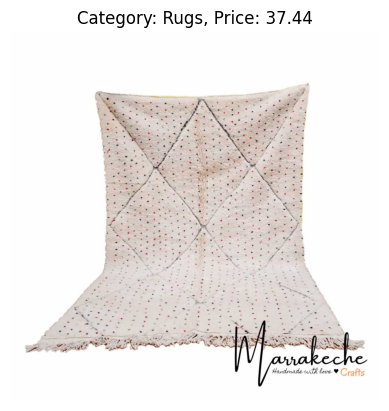

In [14]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from google.colab import files
import io

# Sauvegarder le modèle
model.save('/content/drive/MyDrive/Souk_Connect/trained_model.h5')

# Dictionnaire des sous-catégories
subcategory_dict = {
    "Furniture": ["Home Decor"],
    "Home Decor": [
        "Poufs & Ottomans", "Rugs", "Antique items", "Brass Lamps",
        "Candle Holders", "Pottery", "Kilim poufs", "Pillow Covers",
        "Wall Decor", "Straw Lamps"
    ],
    "Antique items": ["Home Decor"],
    "Brass Lamps": ["Home Decor"],
    "Candle Holders": ["Home Decor", "Pottery"],
    "Pottery": ["Home Decor", "Candle Holders", "Ceramic Vase"],
    "Lighting": ["Straw Lamps"],
    "Accessories": ["Bags and accessories"],
    "Bags and accessories": [
        "Leather Bags", "Straw Bags", "Crochet Bags", "Leather Backpacks"
    ],
    "Kitchenware & Tea Accessories": [
        "Teapots", "Tea Glasses", "Serving trays", "Table & Kitchen Accessories", "Tea Sets"
    ],
    "Ceramics": [
        "Ceramic Plates And Bowls", "Ceramic Cups"
    ]
}

# Fonction pour charger et prétraiter l'image
def preprocess_image(image_path):
    img = image.load_img(image_path, target_size=(224, 224))
    img_array = image.img_to_array(img) / 255.0  # Normaliser l'image
    img_array = np.expand_dims(img_array, axis=0)  # Ajouter une dimension pour le batch
    return img_array

# Fonction pour prédire la catégorie, le prix et la sous-catégorie
def predict_image(model, image_path):
    # Prétraiter l'image
    img_array = preprocess_image(image_path)

    # Faire les prédictions
    category_pred, price_pred = model.predict(img_array)

    # Décoder la catégorie
    category_pred_class = np.argmax(category_pred, axis=1)[0]
    category_name = label_encoder.inverse_transform([category_pred_class])[0]

    # Trouver la sous-catégorie correspondante
    subcategories = subcategory_dict.get(category_name, [])

    # Afficher les résultats
    print(f"Predicted Category: {category_name}")
    print(f"Predicted Price: ${(price_pred[0][0]):.2f}")

    # Afficher l'image avec les prédictions
    img = image.load_img(image_path)
    plt.imshow(img)
    plt.title(f"Category: {category_name}, Price: {(price_pred[0][0]):.2f}")
    plt.axis('off')  # Ne pas afficher les axes
    plt.show()

# Fonction pour uploader l'image depuis le PC
def upload_image():
    # Utiliser le dialogue de téléchargement de fichier de Colab
    uploaded = files.upload()

    # Récupérer le nom du fichier téléchargé
    for file_name in uploaded.keys():
        print(f"Uploaded file: {file_name}")
        predict_image(model, file_name)

# Charger le modèle (assurez-vous qu'il est déjà entraîné et sauvegardé)
# model = tf.keras.models.load_model('path_to_your_trained_model')

# Charger l'encodeur des catégories (assurez-vous qu'il est également sauvegardé)
# label_encoder = LabelEncoder()
# label_encoder.classes_ = np.load('path_to_label_encoder_classes.npy')

# Lancer l'interface pour télécharger l'image
upload_image()